We will measure the activity by counting the number of:
1. posts
2. message_posts
3. inline_notifs
made by a user. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import requests 
import io
import seaborn as sns

### orig_inline_notifications

Read the file.

In [ ]:
orig_inline_notifications = pd.read_csv('/content/drive/MyDrive/text gcn/Hackforum data/CSV Data IronMarch/data_csv/orig_inline_notifications.csv')

In [ ]:
orig_inline_notifications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47066 entries, 0 to 47065
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        47066 non-null  int64 
 1   notify_id         47066 non-null  int64 
 2   notify_to_id      47066 non-null  int64 
 3   notify_sent       47066 non-null  int64 
 4   notify_read       47066 non-null  int64 
 5   notify_title      47066 non-null  object
 6   notify_text       47066 non-null  object
 7   notify_from_id    47066 non-null  int64 
 8   notify_type_key   47066 non-null  object
 9   notify_url        47066 non-null  object
 10  notify_meta_app   33296 non-null  object
 11  notify_meta_area  33296 non-null  object
 12  notify_meta_id    47066 non-null  int64 
 13  notify_meta_key   33296 non-null  object
dtypes: int64(7), object(7)
memory usage: 5.0+ MB


In [ ]:
frame = { '#notifs': orig_inline_notifications['notify_from_id'].value_counts()}
notifs = pd.DataFrame(frame)

In [ ]:
notifs.to_csv("/content/drive/MyDrive/text gcn/created_csv/ironmarch/orig_activity_notifs.csv")

In [ ]:
notifs = pd.read_csv("/content/drive/MyDrive/text gcn/created_csv/ironmarch/orig_activity_notifs.csv")

Rename the first column to member_id for constitency.

In [ ]:
notifs = notifs.rename(columns={"Unnamed: 0": "member_id"})

## orig_posts

In [ ]:
orig_posts = pd.read_csv('/content/drive/MyDrive/text gcn/Hackforum data/CSV Data IronMarch/data_csv/orig_posts.csv', error_bad_lines=False)
frame = { '#posts': orig_posts['author_id'].value_counts()}
posts = pd.DataFrame(frame)
posts.to_csv("/content/drive/MyDrive/text gcn/created_csv/ironmarch/orig_activity_posts.csv")
posts = pd.read_csv("/content/drive/MyDrive/text gcn/created_csv/ironmarch/orig_activity_posts.csv")
posts = posts.rename(columns={"Unnamed: 0": "member_id"})

In [ ]:
posts

,member_id,#posts
0,1,5584
1,1558,3703
2,132,3652
3,7,3128
4,288,3059
...,...,...
729,493,1
730,9637,1
731,6139,1
732,6304,1


## orig_message_posts

In [ ]:
orig_message_posts = pd.read_csv('/content/drive/MyDrive/text gcn/Hackforum data/CSV Data IronMarch/data_csv/orig_message_posts.csv', error_bad_lines=False)
# orig_message_posts = orig_message_posts.loc[orig_message_posts['msg_author_id'].str.contains('^[0-9]*$', regex=True, na=False)]
# orig_message_posts['msg_author_id'] = orig_message_posts['msg_author_id'].astype('int32')
frame = { '#message_posts': orig_message_posts['msg_author_id'].value_counts()}
message_posts = pd.DataFrame(frame)
message_posts.to_csv("/content/drive/MyDrive/text gcn/created_csv/ironmarch/orig_activity_posts.csv")
message_posts = pd.read_csv("/content/drive/MyDrive/text gcn/created_csv/ironmarch/orig_activity_posts.csv")
message_posts = message_posts.rename(columns={"Unnamed: 0": "member_id"})

In [ ]:
message_posts

,member_id,#message_posts
0,7424,542
1,2209,487
2,7816,413
3,1,401
4,0,327
...,...,...
501,9519,1
502,7604,1
503,4339,1
504,7620,1


## Join the Columns

In [ ]:
merger1 = message_posts.merge(notifs, on="member_id", how="outer")

In [ ]:
merger1

,member_id,#message_posts,#notifs
0,7424,542.0,1157.0
1,2209,487.0,NaN
2,7816,413.0,NaN
3,1,401.0,1135.0
4,0,327.0,NaN
...,...,...,...
554,7866,NaN,1.0
555,9532,NaN,1.0
556,25,NaN,1.0
557,9869,NaN,1.0


In [ ]:
merger2 = merger1.merge(posts, on="member_id", how="outer")

In [ ]:
merger2

,member_id,#message_posts,#notifs,#posts
0,7424,542.0,1157.0,1005.0
1,2209,487.0,NaN,83.0
2,7816,413.0,NaN,946.0
3,1,401.0,1135.0,5584.0
4,0,327.0,NaN,2768.0
...,...,...,...,...
731,252,NaN,NaN,1.0
732,493,NaN,NaN,1.0
733,6139,NaN,NaN,1.0
734,6304,NaN,NaN,1.0


# Merge with orig_members

In [ ]:
orig_members = pd.read_csv("/content/drive/MyDrive/text gcn/Hackforum data/CSV Data IronMarch/data_csv/orig_members.csv")

In [ ]:
orig_members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 75 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 763 non-null    int64  
 1   member_id                  763 non-null    int64  
 2   name                       763 non-null    object 
 3   member_group_id            763 non-null    int64  
 4   email                      763 non-null    object 
 5   joined                     763 non-null    int64  
 6   ip_address                 763 non-null    object 
 7   posts                      763 non-null    int64  
 8   title                      98 non-null     object 
 9   allow_admin_mails          763 non-null    int64  
 10  time_offset                755 non-null    float64
 11  skin                       271 non-null    float64
 12  warn_level                 212 non-null    float64
 13  warn_lastwarn              763 non-null    int64  

## Drop the irrelevant colunms

In [ ]:
orig_members.drop(orig_members.columns[[0, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]], axis =1, inplace=True)

In [ ]:
db = orig_members.merge(merger2, on="member_id", how="left")

In [ ]:
db = db.replace(to_replace=np.nan, value=0)

In [ ]:
db["total_content"] = db["#message_posts"]+	db["#notifs"]+	db["#posts"]

Text(0, 0.5, 'Count of People')

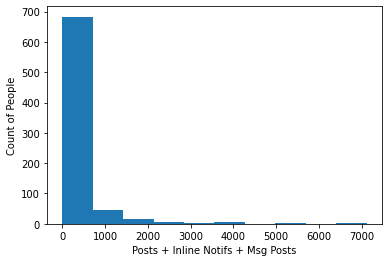

In [ ]:
plt.hist(db["total_content"])
plt.xlabel("Posts + Inline Notifs + Msg Posts")
plt.ylabel("Count of People")

Text(0, 0.5, 'Count of People')

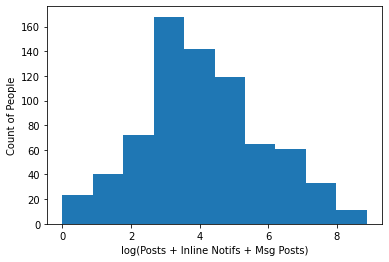

In [ ]:
plt.hist(np.log(db["total_content"].replace(to_replace=0, value=np.nan)))
plt.xlabel("log(Posts + Inline Notifs + Msg Posts)")
plt.ylabel("Count of People")

Text(0, 0.5, 'Count of People')

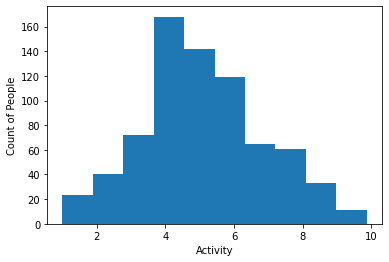

In [ ]:
db["activity"] = 1+np.log(db["total_content"].replace(to_replace=0, value=np.nan))
plt.hist(db["activity"])
plt.xlabel("Activity")
plt.ylabel("Count of People")

## Normalise Activity

In [ ]:
db["n_activity"] = (db['activity']-min(db['activity']))/(max(db['activity'])-min(db['activity']))

Text(0, 0.5, 'Count of People')

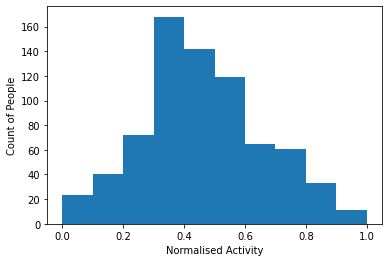

In [ ]:
plt.hist(db["n_activity"])
plt.xlabel("Normalised Activity")
plt.ylabel("Count of People")

In [ ]:
db = db.replace(to_replace=np.nan, value=0)

In [ ]:
# save the final database which has the activity score
db.to_csv("/content/drive/MyDrive/text gcn/created_csv/ironmarch/orig_score_activity.csv")